In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import torch
import tensorflow as tf
%matplotlib inline

In [21]:
df=pd.read_csv('./titanic.csv')
df.head(3) # Missing values completely at Random (MCAR)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.shape

(891, 12)

In [5]:
df['Cabin_Null']=np.where(df['Cabin'].isnull(),1,0) # if nan, 1 else 0
df['Cabin_Null'].mean() # % of number of values that is null

0.7710437710437711

In [6]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0


In [7]:
df.groupby(by='Survived')['Cabin_Null'].mean() #% of survived vs not survived and their respective % of null values for Cabin

Survived
0    0.876138
1    0.602339
Name: Cabin_Null, dtype: float64

In [35]:
df['Cabin'].value_counts()

B96 B98        5
G6             5
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [36]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0]) # Mode imputation
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S


In [37]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [8]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
df.isnull().mean() # % of missing values in each

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [11]:
def impute_nan_median(df,feature,median): #Median Imputation
  df[feature + ' Median']=df[feature].fillna(median)

In [13]:
median=df['Age'].median()
median

28.0

In [14]:
impute_nan_median(df,'Age',median)
df.head()

,Survived,Age,Fare,Age Median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [15]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age Median      0
dtype: int64

In [16]:
print(df['Age'].std()) # Median imputation affects distribution of og feature
print(df['Age Median'].std())

14.526497332334042
13.019696550973201


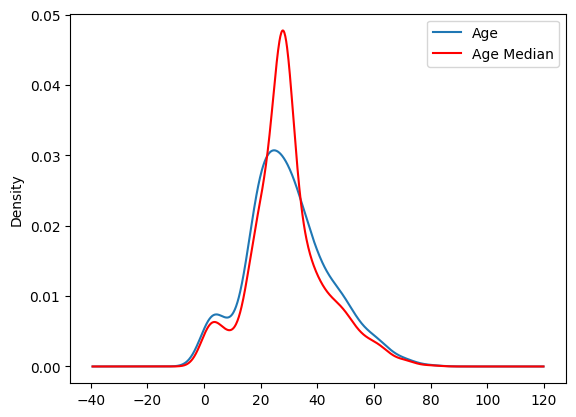

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age Median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')